<a href="https://colab.research.google.com/github/FGpramodgupta/CNNStateofArtTemplate/blob/main/DocumentClassification_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

80142336/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 1.3244 - accuracy: 0.6433 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 574 bytes but only got 432. Skipping tag 347
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 48 bytes but only got 0. Skipping tag 532
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


56/56 [==============================] - 1214s 21s/step - loss: 1.3139 - accuracy: 0.6462 - val_loss: 1.1006 - val_accuracy: 0.6514
Epoch 2/20
56/56 [==============================] - 123s 2s/step - loss: 0.2087 - accuracy: 0.9419 - val_loss: 1.0815 - val_accuracy: 0.6549
Epoch 3/20
56/56 [==============================] - 122s 2s/step - loss: 0.1046 - accuracy: 0.9701 - val_loss: 0.9398 - val_accuracy: 0.6972
Epoch 4/20
56/56 [==============================] - 122s 2s/step - loss: 0.0557 - accuracy: 0.9868 - val_loss: 0.9456 - val_accuracy: 0.6479
Epoch 5/20
56/56 [==============================] - 122s 2s/step - loss: 0.0609 - accuracy: 0.9829 - val_loss: 1.0801 - val_accuracy: 0.7007
Epoch 6/20
56/56 [==============================] - 123s 2s/step - loss: 0.0490 - accuracy: 0.9907 - val_loss: 1.1707 - val_accuracy: 0.6831
Epoch 7/20
56/56 [==============================] - 122s 2s/step - loss: 0.0417 - accuracy: 0.9908 - val_loss: 0.9356 - val_accuracy: 0.7535
Epoch 8/20
56/56 [====

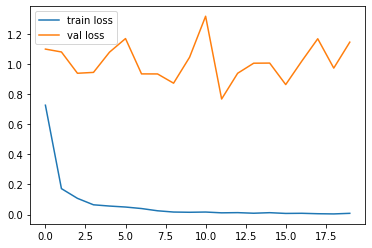

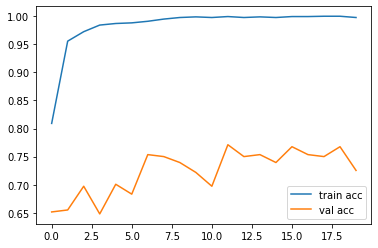

<Figure size 432x288 with 0 Axes>

In [1]:

 
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

 
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Documents/train'
valid_path = '/content/drive/MyDrive/Dataset/Documents/test'


# %% [markdown]
#  Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
#  Here we will be using imagenet weights

 

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


 
# don't train existing weights
for layer in VGG19.layers:
    layer.trainable = False

 
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Documents/train/*')
folders

 
# our layers - you can add more if you want
x = Flatten()(VGG19.output)

 
len(folders)

 
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

 

# view the structure of the model
model.summary()


 
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Documents/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

 
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Documents/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

 
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

 
import matplotlib.pyplot as plt

 
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

 
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/Documents/Models/model_vgg19.h5')

 


In [18]:

# y_pred = model.predict(test_set)
# y_pred

 
# import numpy as np
# y_pred = np.argmax(y_pred, axis=1)

 
# y_pred


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
# %%
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor





# %%

test_image = load_image(r'/content/drive/MyDrive/Dataset/Documents/validation/yes_bank_prosperity_rewards_credit_card.png')
prediction = model.predict(test_image)
prediction

# %%

indexes = np.argmax(prediction, axis=1)
#print(indexes)
#training_set.class_indices
classes=training_set.class_indices

key_list = list(classes.keys())
val_list = list(classes.values())


position = val_list.index(indexes)
print(key_list[position])





creditcard


In [22]:
# %%
import os
import csv
 

import os
validationpath=r'/content/drive/MyDrive/Dataset/Documents/validation/'
predictionpath=r'/content/drive/MyDrive/Dataset/Documents/prediction/VGG19/'
for filename in os.listdir(validationpath):
    test_image = load_image(validationpath + filename)
    prediction = model.predict(test_image)
    prediction
    indexes = np.argmax(prediction, axis=1)
    print(indexes)
    position = val_list.index(indexes)
    print(key_list[position])
    
    img = image.load_img(validationpath + filename)
    img.save(predictionpath + key_list[position] +'_vgg19_' + filename)
# %%

[6]
ecsmandate
[6]
ecsmandate
[8]
pan
[8]
pan
[8]
pan
[8]
pan
[8]
pan
[8]
pan
[0]
aadhaar
[8]
pan
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[0]
aadhaar
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[2]
cheque
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard
[3]
creditcard


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[3]
creditcard
[3]
creditcard
[3]
creditcard
[8]
pan
